The goal of this notebook is to produce a few visuals illustrating how Gaussian Process Regression (GPR) works in python.

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from utils import gausian_helper

<Axes: >

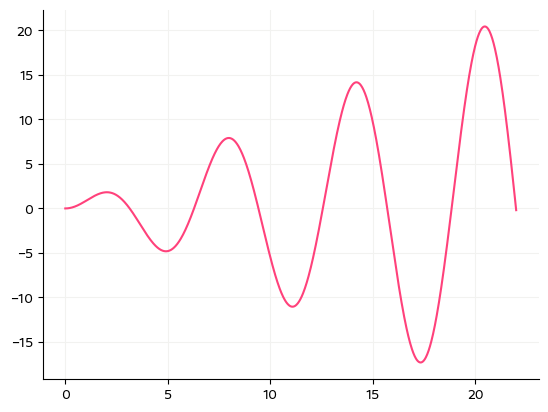

In [39]:
X = np.linspace(start=0, stop=22, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
sns.lineplot(x=X.ravel(), y=y)

#### Train test sample

In [41]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=8, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
X_train

array([[11.16516517],
       [18.01401401],
       [ 9.95395395],
       [ 8.1041041 ],
       [ 5.32932933],
       [20.45845846],
       [ 5.76976977],
       [17.83783784]])

## No noise gaussian

In [42]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

13.6**2 * RBF(length_scale=1.94)

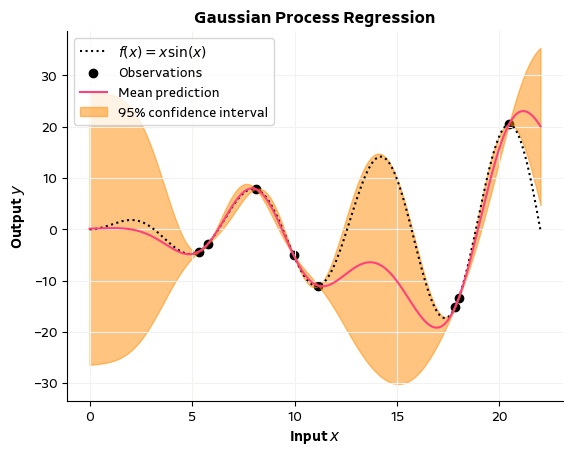

In [19]:
colors = utils.theme_branding.BRAND_COLOURS
gausian_helper.plot_gaussian_process_no_noise(gaussian_process, X, y, X_train, y_train)

We can see the prediction failing at the boundary.

## Noise and resampling
The sklearn implementation accepts a constant as variance of Gaussian noise. i.e. it is unable to adjust to the magnitude of sampled noise directly, and is thus not suitable for our applications.

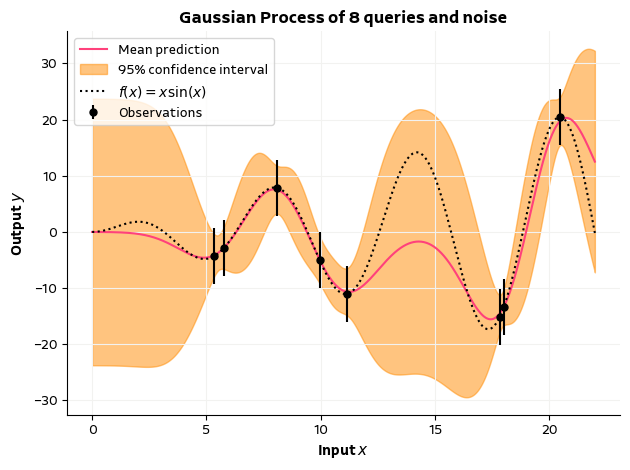

In [43]:
noise_alpha = 5
noised_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha = noise_alpha)
gausian_helper.plot_gaussian_process_no_noise(noised_model, X, y, X_train, y_train)
plt.title(f"Gaussian Process of 8 queries and noise")
plt.tight_layout()
plt.savefig(f"images/gaussian_process_8_queries_noise.png", dpi = 500)


We can see that noise widens the 95 confidence bounds, which makes the model less likely to miss information. Consequently, slight over-noising assumption might be useful for BO.